# Handling Missing Values

## 1. Continuous data

### (i) Mean,Median,Mode - assumption(MCAR)

In [93]:
import numpy as np

import pandas as pd

In [94]:
titanic=pd.read_csv("data_sets/titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [96]:
# so we will take the the columns with missing values
data=titanic[['Age','Cabin','Embarked']]
data.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


In [97]:
def m_imputation(df,variable,method_value,method):
    data[variable + "_"+method]=data[variable]
    data[variable + "_"+method].fillna(method_value,inplace=True)

In [98]:
mean=data['Age'].mean()
mean=round(mean,2)
m_imputation(data,'Age',mean,'mean')

median=data['Age'].median()
m_imputation(data,'Age',median,'median')

mode=data['Age'].mode()[0]
m_imputation(data,'Age',mode,'mode')

data.head(10)

<ipython-input-97-aacd60246f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable + "_"+method]=data[variable]
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Age,Cabin,Embarked,Age_mean,Age_median,Age_mode
0,22.0,NaN,S,22.0,22.0,22.0
1,38.0,C85,C,38.0,38.0,38.0
2,26.0,NaN,S,26.0,26.0,26.0
3,35.0,C123,S,35.0,35.0,35.0
4,35.0,NaN,S,35.0,35.0,35.0
5,NaN,NaN,Q,29.7,28.0,24.0
6,54.0,E46,S,54.0,54.0,54.0
7,2.0,NaN,S,2.0,2.0,2.0
8,27.0,NaN,S,27.0,27.0,27.0
9,14.0,NaN,C,14.0,14.0,14.0


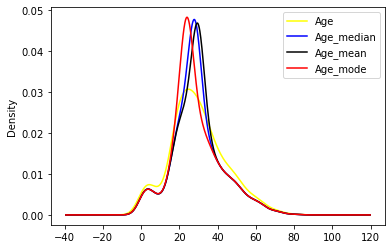

In [100]:

import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111) # ax = common axis
data['Age'].plot(kind='kde',ax=ax,color='yellow') #plot age
data['Age_median'].plot(kind='kde',ax=ax,color='blue') #plot age_median
data.Age_mean.plot(kind='kde',ax=ax,color='black') # plot age_mean
data.Age_mode.plot(kind='kde',ax=ax,color='red') # plot age_mode
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### (ii) Randmom Sample Imputation

In [101]:
#take random values equal to the number of missing values
data=titanic[['Age','Survived']]
data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [102]:
#lets extract samples
random_sample=data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=42)
random_sample

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [103]:
#now make the index of sample equal to index of missing values in age column
random_sample.index=data[data['Age'].isnull()].index
random_sample

5      42.0
17      3.0
19     29.0
26     24.0
28     43.0
       ... 
859    18.0
863    24.0
868     4.0
878    22.0
888    52.0
Name: Age, Length: 177, dtype: float64

In [104]:
# use loc[locations,variable name] to replace the values of NANs with random sample values
data['Age_random']=data['Age']
data.loc[data['Age'].isnull(),"Age_random"]=random_sample
data[data['Age'].isnull()]

<ipython-input-104-55f905d5ffab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_random']=data['Age']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Age,Survived,Age_random
5,NaN,0,42.0
17,NaN,1,3.0
19,NaN,1,29.0
26,NaN,0,24.0
28,NaN,1,43.0
...,...,...,...
859,NaN,0,18.0
863,NaN,0,24.0
868,NaN,0,4.0
878,NaN,0,22.0


<ipython-input-105-9ab6d997699b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_median']=data['Age']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


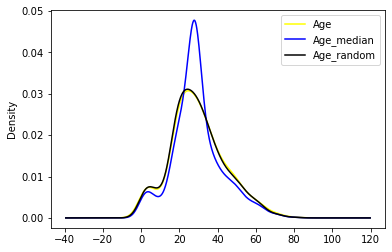

In [105]:
data['Age_median']=data['Age']
median=data['Age'].median()
data['Age_median'].fillna(median,inplace=True)

import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111) # ax = common axis
data['Age'].plot(kind='kde',ax=ax,color='yellow') #plot age
data['Age_median'].plot(kind='kde',ax=ax,color='blue') #plot age
data.Age_random.plot(kind='kde',ax=ax,color='black') # plot age_random
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')




### (iii) Capturing NAN values with new Feature
##### We just create new feature and store 1s and 0s - 1 for NAN and 0 For not NAN 
#### Assumes (MNAR) when data is not missing at random  we store the missingness

In [118]:
data=titanic[['Age','Survived']]
data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [119]:
data['Age_nana_status']=np.where(data['Age'].isnull(),1,0)
data.head(10)

<ipython-input-119-bae26c78c07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_nana_status']=np.where(data['Age'].isnull(),1,0)


,Age,Survived,Age_nana_status
0,22.0,0,0
1,38.0,1,0
2,26.0,1,0
3,35.0,1,0
4,35.0,0,0
5,NaN,0,1
6,54.0,0,0
7,2.0,0,0
8,27.0,1,0
9,14.0,1,0


In [120]:
## now we cna apply other methods to fill the NANs.

### (iv) End Of Distribution Imputation
##### Mainy we take data beyond third Standard Deviation and side from which we pick the value depends upon outliers. We choose the side in which outliers are present

In [122]:
data=titanic[['Age','Survived']]
data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

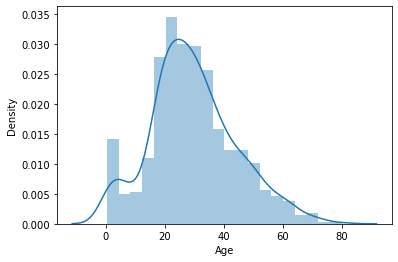

In [123]:
import seaborn as sns
sns.distplot(data['Age'])

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

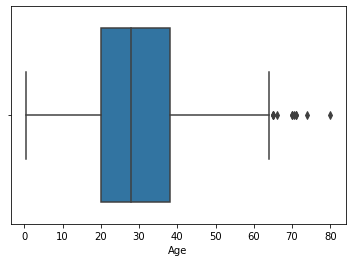

In [129]:
sns.boxplot(data['Age'])

In [132]:
# Outliers in right side so take extreme value from right
#value after 3rd SD
extreme_value=data['Age'].mean()+3*data.Age.std()
extreme_value

73.27860964406095

In [135]:
data['Age_extreme']=data['Age']
data['Age_extreme'].fillna(extreme_value,inplace=True)
data.head(20)

<ipython-input-135-424c82f32d4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_extreme']=data['Age']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Age,Survived,Age_extreme
0,22.0,0,22.00000
1,38.0,1,38.00000
2,26.0,1,26.00000
3,35.0,1,35.00000
4,35.0,0,35.00000
5,NaN,0,73.27861
6,54.0,0,54.00000
7,2.0,0,2.00000
8,27.0,1,27.00000
9,14.0,1,14.00000


<AxesSubplot:>

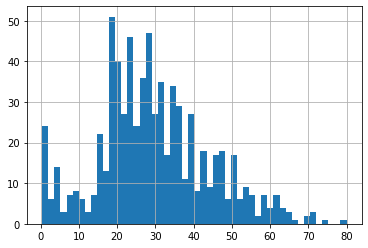

In [147]:
data['Age'].hist(bins=50)

<AxesSubplot:>

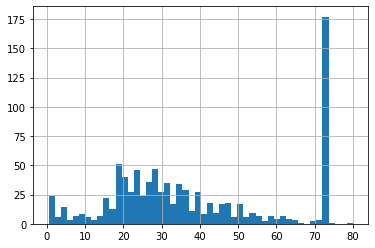

In [148]:
data['Age_extreme'].hist(bins=50)

In [149]:
## distortion is a really big disadvantage ...it leads on masking the predective importance and meaningfullness of the variable

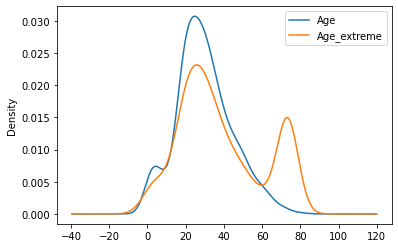

In [152]:
fig=plt.figure()
ax=fig.add_subplot(111)
data.Age.plot(kind='kde',ax=ax)
data.Age_extreme.plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### (v) Arbitrary Value Imputation
##### Least frequent and mostly outlier values

In [154]:
data=titanic[['Age','Fare']]
data

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


<AxesSubplot:>

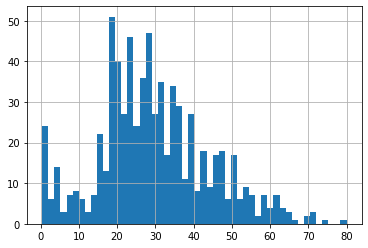

In [155]:
data['Age'].hist(bins=50)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

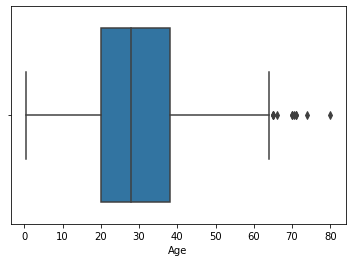

In [156]:
sns.boxplot(data['Age'])

In [158]:
# so take 80
data['Age_arbitrary']=data['Age']
data['Age_arbitrary'].fillna(80,inplace=True)
data.head(10)

<ipython-input-158-442f4c795c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_arbitrary']=data['Age']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Age,Fare,Age_arbitrary
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0
5,NaN,8.4583,80.0
6,54.0,51.8625,54.0
7,2.0,21.0750,2.0
8,27.0,11.1333,27.0
9,14.0,30.0708,14.0


<AxesSubplot:>

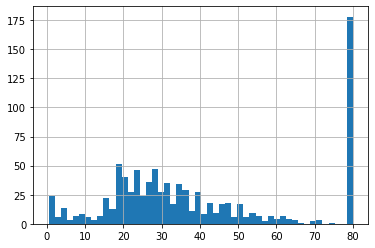

In [159]:
data['Age_arbitrary'].hist(bins=50)


C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_arbitrary'>

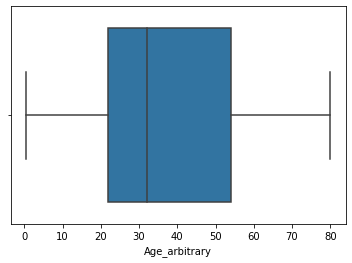

In [161]:
sns.boxplot(data['Age_arbitrary'])


### /\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\//\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\

## 2. Categorical Variables

### (i) Frequent Category Imputation 

In [55]:
import pandas as pd
house=pd.read_csv('data_sets/house_price_train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
house.shape

(1460, 81)

In [57]:
data=house[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [58]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [59]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [60]:
data.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [61]:
# most frequent value in BsmtQual column
most_freq=data['BsmtQual'].mode()[0]
most_freq

'TA'

In [62]:
# replace using fillna
data['BsmtQual_most_freq']=data['BsmtQual']
data['BsmtQual_most_freq'].fillna(most_freq,inplace=True)
data.head()

<ipython-input-62-d80933c9e022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BsmtQual_most_freq']=data['BsmtQual']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_most_freq
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,Gd
2,Gd,TA,Attchd,223500,Gd
3,TA,Gd,Detchd,140000,TA
4,Gd,TA,Attchd,250000,Gd


In [63]:
replace=[most_freq for i in range(data['BsmtQual'].isnull().sum())]
replace[0:5]

['TA', 'TA', 'TA', 'TA', 'TA']

In [64]:
data['BsmtQual_using_loc']=data['BsmtQual']
data.loc[data['BsmtQual'].isnull(),'BsmtQual_using_loc']='TA'
data.head(20)

<ipython-input-64-a7a8ca477d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BsmtQual_using_loc']=data['BsmtQual']
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_most_freq,BsmtQual_using_loc
0,Gd,NaN,Attchd,208500,Gd,Gd
1,Gd,TA,Attchd,181500,Gd,Gd
2,Gd,TA,Attchd,223500,Gd,Gd
3,TA,Gd,Detchd,140000,TA,TA
4,Gd,TA,Attchd,250000,Gd,Gd
5,Gd,NaN,Attchd,143000,Gd,Gd
6,Ex,Gd,Attchd,307000,Ex,Ex
7,Gd,TA,Attchd,200000,Gd,Gd
8,TA,TA,Detchd,129900,TA,TA
9,TA,TA,Attchd,118000,TA,TA


In [65]:
data.isnull().sum()

BsmtQual               37
FireplaceQu           690
GarageType             81
SalePrice               0
BsmtQual_most_freq      0
BsmtQual_using_loc      0
dtype: int64

(array([618.,   0.,   0., 649.,   0.,   0., 121.,   0.,   0.,  35.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

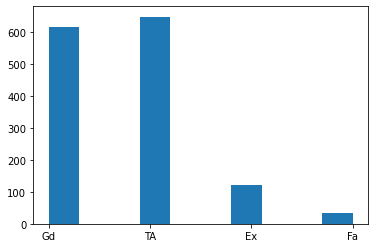

In [67]:
import matplotlib.pyplot as plt
plt.hist(data['BsmtQual'].dropna())

(array([618.,   0.,   0., 686.,   0.,   0., 121.,   0.,   0.,  35.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

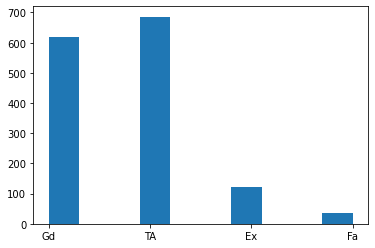

In [68]:
import matplotlib.pyplot as plt
plt.hist(data['BsmtQual_most_freq'])

### (i)- b  By adding seperate category for missing values eg. Missing

In [72]:
data1=house[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
data1['BsmtQual_add_category']=data1["BsmtQual"]
data1.loc[data1['BsmtQual_add_category'].isnull(),'BsmtQual_add_category']='Missing'
data1.head(20)

<ipython-input-72-f3b48b643841>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BsmtQual_add_category']=data1["BsmtQual"]
C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_add_category
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,Gd
2,Gd,TA,Attchd,223500,Gd
3,TA,Gd,Detchd,140000,TA
4,Gd,TA,Attchd,250000,Gd
5,Gd,NaN,Attchd,143000,Gd
6,Ex,Gd,Attchd,307000,Ex
7,Gd,TA,Attchd,200000,Gd
8,TA,TA,Detchd,129900,TA
9,TA,TA,Attchd,118000,TA


(array([618.,   0., 649.,   0.,   0., 121.,   0.,  37.,   0.,  35.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

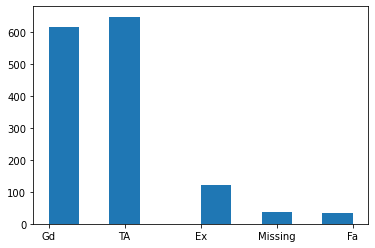

In [73]:
plt.hist(data1['BsmtQual_add_category'])